<a href="https://colab.research.google.com/github/Chuck2Win/For-Paper/blob/master/Topic_Modeling_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import Counter

In [2]:
# data
documents = [["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]]

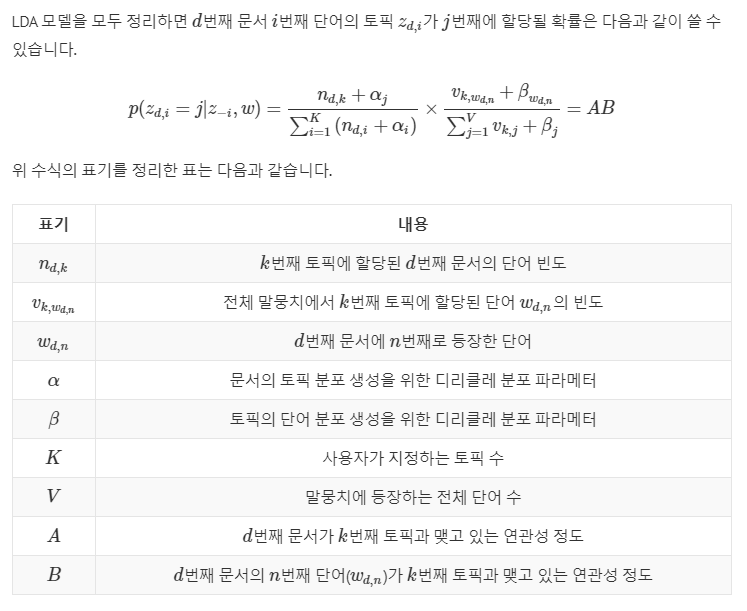


In [3]:
documents

[['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'],
 ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
 ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'],
 ['R', 'Python', 'statistics', 'regression', 'probability'],
 ['machine learning', 'regression', 'decision trees', 'libsvm'],
 ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'],
 ['statistics', 'probability', 'mathematics', 'theory'],
 ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'],
 ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'],
 ['Hadoop', 'Java', 'MapReduce', 'Big Data'],
 ['statistics', 'R', 'statsmodels'],
 ['C++', 'deep learning', 'artificial intelligence', 'probability'],
 ['pandas', 'R', 'Python'],
 ['databases', 'HBase', 'Postgres', 'MySQL', 'MongoDB'],
 ['libsvm', 'regression', 'support vector machines']]

In [45]:
import random
random.seed(0)

# topic 수 지정
K=4

# 각 단어를 임의의 토픽에 랜덤 배정
document_topics=[[random.randrange(K) for word in document] for document in documents]

# 각 문서별 토픽별 단어 빈도 (n_d,k)
document_topic_counts=[Counter() for _ in documents]

# 각 문서에 포함되는 총 단어 수
document_lengths=list(map(len,documents))  # sum(n_d,i)

# 각 토픽별 각 단어의 빈도 (v_k,w_d,n)
topic_word_counts=[Counter() for _ in range(K)]

# 각 토픽에 할당되는 총 단어 수
topic_counts=[0 for _ in range(K)] # sum(v_k,j)

# 단어의 종류의 수
distinct_words=set(word for document in documents for word in document)

# 총 문서의 수
D=len(documents)

# 숫자 카운팅
for d in range(D):
    for word,topic in zip(documents[d],document_topics[d]):
        # 문서별 토픽의 단어 빈도
        document_topic_counts[d][topic]+=1
        # 토픽별 각 단어의 빈도
        topic_word_counts[topic][word]+=1
        # 토픽별 단어의 수
        topic_counts[topic]+=1

In [12]:
documents

[['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'],
 ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
 ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'],
 ['R', 'Python', 'statistics', 'regression', 'probability'],
 ['machine learning', 'regression', 'decision trees', 'libsvm'],
 ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'],
 ['statistics', 'probability', 'mathematics', 'theory'],
 ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'],
 ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'],
 ['Hadoop', 'Java', 'MapReduce', 'Big Data'],
 ['statistics', 'R', 'statsmodels'],
 ['C++', 'deep learning', 'artificial intelligence', 'probability'],
 ['pandas', 'R', 'Python'],
 ['databases', 'HBase', 'Postgres', 'MySQL', 'MongoDB'],
 ['libsvm', 'regression', 'support vector machines']]

In [23]:
document_topics

[[3, 3, 0, 2, 3, 3, 2],
 [3, 2, 1, 1, 2],
 [1, 0, 2, 1, 2, 0],
 [0, 2, 3, 0, 2],
 [3, 2, 1, 3],
 [3, 2, 0, 0, 0, 3],
 [0, 3, 2, 1],
 [2, 0, 1, 1],
 [1, 1, 3, 0],
 [0, 2, 3, 0],
 [2, 2, 0],
 [2, 1, 2, 3],
 [0, 3, 2],
 [1, 2, 1, 1, 1],
 [0, 2, 3]]

In [46]:
print(document_topic_counts)
print(topic_word_counts)
print(topic_counts)

[Counter({3: 4, 2: 2, 0: 1}), Counter({2: 2, 1: 2, 3: 1}), Counter({1: 2, 0: 2, 2: 2}), Counter({0: 2, 2: 2, 3: 1}), Counter({3: 2, 2: 1, 1: 1}), Counter({0: 3, 3: 2, 2: 1}), Counter({0: 1, 3: 1, 2: 1, 1: 1}), Counter({1: 2, 2: 1, 0: 1}), Counter({1: 2, 3: 1, 0: 1}), Counter({0: 2, 2: 1, 3: 1}), Counter({2: 2, 0: 1}), Counter({2: 2, 1: 1, 3: 1}), Counter({0: 1, 3: 1, 2: 1}), Counter({1: 4, 2: 1}), Counter({0: 1, 2: 1, 3: 1})]
[Counter({'scikit-learn': 2, 'pandas': 2, 'HBase': 1, 'R': 1, 'regression': 1, 'Java': 1, 'C++': 1, 'Haskell': 1, 'statistics': 1, 'artificial intelligence': 1, 'Hadoop': 1, 'Big Data': 1, 'statsmodels': 1, 'libsvm': 1}), Counter({'neural networks': 2, 'deep learning': 2, 'Cassandra': 1, 'HBase': 1, 'Python': 1, 'numpy': 1, 'decision trees': 1, 'theory': 1, 'Mahout': 1, 'databases': 1, 'Postgres': 1, 'MySQL': 1, 'MongoDB': 1}), Counter({'Java': 2, 'Python': 2, 'regression': 2, 'R': 2, 'Cassandra': 1, 'MongoDB': 1, 'Postgres': 1, 'scipy': 1, 'statsmodels': 1, 'prob

 우리의 목표는 토픽-단어, 문서-토픽 에 대한 결합 확률 분포(unknown)으로 부터 표본을 얻는 것이므로, 깁스 샘플링을 수행하면 된다. iteration = 1000

In [25]:
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + V * beta))

def topic_weight(d, word, k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) for k in range(K)])

def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random() # scaling 해주는 것이네
    for i, w in enumerate(weights):
        rnd -= w 
        if rnd <= 0:
            return i

In [47]:
document_topics

[[3, 3, 0, 2, 3, 3, 2],
 [3, 2, 1, 1, 2],
 [1, 0, 2, 1, 2, 0],
 [0, 2, 3, 0, 2],
 [3, 2, 1, 3],
 [3, 2, 0, 0, 0, 3],
 [0, 3, 2, 1],
 [2, 0, 1, 1],
 [1, 1, 3, 0],
 [0, 2, 3, 0],
 [2, 2, 0],
 [2, 1, 2, 3],
 [0, 3, 2],
 [1, 2, 1, 1, 1],
 [0, 2, 3]]

In [48]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):
            # 깁스 샘플링 수행을 위해
            # 샘플링 대상 word와 topic을 제외하고 세어봄 z_(-i)
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # 깁스 샘플링 대상 word와 topic을 제외한 
            # 말뭉치 모든 word의 topic 정보를 토대로
            # 샘플링 대상 word의 새로운 topic을 선택
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # 샘플링 대상 word의 새로운 topic을 반영해 
            # 말뭉치 정보 업데이트
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

In [49]:
document_topics

[[0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1],
 [2, 2, 1, 1, 3, 3],
 [2, 3, 3, 2, 3],
 [1, 2, 1, 2],
 [2, 2, 0, 0, 2, 0],
 [3, 3, 2, 3],
 [1, 2, 2, 1],
 [1, 1, 0, 1],
 [0, 0, 0, 0],
 [3, 3, 3],
 [3, 0, 3, 3],
 [3, 3, 3],
 [1, 1, 1, 1, 1],
 [2, 2, 2]]

In [58]:
for k,words in enumerate(topic_word_counts):
    print(k)
    print(sorted(words.keys(),key=lambda i : words[i])[:5])

0
['scikit-learn', 'pandas', 'R', 'regression', 'Haskell']
1
['Python', 'theory', 'Mahout', 'probability', 'scikit-learn']
2
['Java', 'Cassandra', 'MongoDB', 'Postgres', 'scipy']
3
['Hadoop', 'Big Data', 'Spark', 'Storm', 'NoSQL']


In [59]:
words.most_common()

[('statistics', 3),
 ('probability', 3),
 ('Python', 2),
 ('R', 2),
 ('pandas', 2),
 ('statsmodels', 2),
 ('C++', 1),
 ('artificial intelligence', 1),
 ('theory', 1),
 ('Hadoop', 0),
 ('Big Data', 0),
 ('Spark', 0),
 ('Storm', 0),
 ('NoSQL', 0),
 ('machine learning', 0),
 ('libsvm', 0),
 ('programming languages', 0),
 ('MapReduce', 0),
 ('support vector machines', 0),
 ('decision trees', 0),
 ('deep learning', 0),
 ('mathematics', 0),
 ('Haskell', 0),
 ('HBase', 0),
 ('Cassandra', 0),
 ('Java', 0),
 ('MongoDB', 0),
 ('Postgres', 0),
 ('regression', 0),
 ('scipy', 0),
 ('Mahout', 0),
 ('databases', 0),
 ('MySQL', 0),
 ('scikit-learn', 0),
 ('neural networks', 0),
 ('numpy', 0)]